In [1]:
using quantumoptics

In [2]:
x0 = 1.
p0 = -1.
sigma = 1.
sigma_x = sigma/sqrt(2)
sigma_p = sigma*sqrt(2)

N = 100

xmin = -15.
xmax = 15.
dx = (xmax - xmin)/N
xspan = linspace(xmin, xmax, N+1)[1:end-1]

#pmin = -N/(xmax - xmin)*2
pmin = -pi/dx
pmax = pi/dx
dp = pmax/N
println("dp = ", dp)
#pmax = N*dp + dp
pspan = linspace(pmin, pmax, N+1)[1:end-1]

basis_position = quantumoptics.particle.PositionBasis(xmin, xmax, N)
basis_momentum = quantumoptics.particle.MomentumBasis(pmin, pmax, N)
psi = quantumoptics.particle.gaussianstate(basis_position, x0, p0, sigma)

xop = quantumoptics.particle.positionoperator(basis_position)
println("<x> = ", quantumoptics.expect(xop, psi))
pop = quantumoptics.particle.momentumoperator(basis_position)
println("<p> = ", quantumoptics.expect(pop, psi))

psi_fft = Ket(basis_momentum)
psi_fft.data = ifftshift(fft(psi.data))/sqrt(N)
xop_ = quantumoptics.particle.positionoperator(basis_momentum)
println("<x> = ", quantumoptics.expect(xop_, psi_fft))
pop_ = quantumoptics.particle.momentumoperator(basis_momentum)
println("<p> = ", quantumoptics.expect(pop_, psi_fft))

psi_ = Ket(basis_position)
psi_.data = ifft(ifftshift(psi_fft.data))*sqrt(N)

nx = real(dagger(psi).data .* psi.data)
nx_ = real(dagger(psi_).data .* psi_.data)
np = real(dagger(psi_fft).data .* psi_fft.data)
println(norm(psi))
println(norm(psi_fft))
println(norm(psi_))
println(pspan[findmax(np)[2]])

dp = 0.10471975511965978
<x> = 0.9999999999999866 - 1.9737042267511062e-18im
<p> = -0.9631508255958506 + 5.272409242615523e-17im
<x> = -0.9818784417756145 + 3.407701115120425e-17im
<p> = -1.0000000000000007 + 6.114552657809044e-19im
1.0

In [3]:
using PyPlot


1.0000000000000002
1.0000000000000002
-1.0471975511965965


In [4]:
psi_fft2 = quantumoptics.particle.transformation(basis_position, basis_momentum, psi)
psi2 = quantumoptics.particle.transformation(basis_momentum, basis_position, psi_fft2)
nx2_ = real(dagger(psi2).data .* psi2.data)
np2 = real(dagger(psi_fft2).data .* psi_fft2.data);

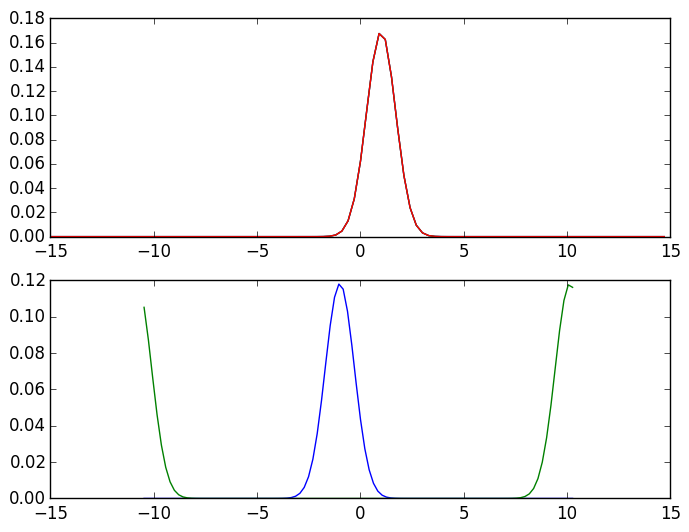

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f94c240fc50>

In [5]:
subplot(2,1,1)
plot(xspan, nx)
plot(xspan, nx_)
plot(xspan, nx2_)
subplot(2,1,2)
plot(pspan, np)
plot(pspan, np2)